<a href="https://colab.research.google.com/github/akispan/crime_rate_project/blob/main/police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [59]:
import json

with open('/content/drive/My Drive/data_for_colab/police/data.json') as f:
    data = json.load(f)

In [60]:
print(data[0])

['Ιανουάριος 2021', [{'title': '31-01-2021: Κυκλοφοριακές ρυθμίσεις στις οδούς Χαμοστέρνας και Πειραιώς λόγω εργασιών', 'text': 'ΓΡΑΦΕΙΟ ΕΝΗΜΕΡΩΣΗΣ ΔΗΜΟΣΙΟΓΡΑΦΩΝ ΑΤΤΙΚΗΣΑθήνα, 31 Ιανουαρίου 2021 ΔΕΛΤΙΟ ΤΥΠΟΥ Λόγω εκτέλεσης εργασιών, την 1 και 2/2/2021 και κατά τις ώρες 07.30΄ έως 15.30΄, θα πραγματοποιηθεί προσωρινή και τμηματική διακοπή της κυκλοφορίας των οχημάτων στα παρακάτω οδικά τμήματα, περιοχής Δήμων Αθηναίων και Μοσχάτου-Ταύρου, ως εξής: Στην αριστερή λωρίδα κυκλοφορίας των οχημάτων του υπογείου τμήματος της οδού Χαμοστέρνας, από το ύψος της συμβολής του με την οδό Αλκμήνης έως το ύψος της συμβολής του με την οδό Πειραιώς, ρεύμα κυκλοφορίας προς Ρούφ, μέγιστου μήκους 300μ. Στην αριστερή λωρίδα κυκλοφορίας των οχημάτων του υπογείου τμήματος της οδού Χαμοστέρνας, από το ύψος της συμβολής του με την οδό Αλκμήνης έως το ύψος της συμβολής του με την οδό Πειραιώς, ρεύμα κυκλοφορίας προς Πειραιά, μέγιστου μήκους 200μ. Στη δεξιά λωρίδα κυκλοφορίας των οχημάτων της οδού Πειραιώς, στο τ

In [61]:
original_size = 0
delete_size = 0
for item in data:
  for i in reversed(item[1]):
    original_size += 1
    if i['text'] == 'Δείτε τον πίνακα εδώ' or 'Δείτε εδώ αναλυτικό'in i['text']:
      item[1].remove(i)
      delete_size += 1
print('Total   size :',original_size)
print('Anused  size :',delete_size)
print('Process size :',original_size - delete_size)

Total   size : 1789
Anused  size : 79
Process size : 1710


In [62]:
for month in data:

    for report in month[1]:

        if 'ΔΕΛΤΙΟ ΤΥΠΟΥ' in report['text']:
            report['text'] = report['text'].split('ΔΕΛΤΙΟ ΤΥΠΟΥ')[1].strip()
        elif 'ΑΝΑΚΟΙΝΩΣΗ' in report['text']:
            report['text'] = report['text'].split('ΑΝΑΚΟΙΝΩΣΗ')[1].strip()

In [ ]:
pprint(data[0])

('31-01-2021: Κυκλοφοριακές ρυθμίσεις στις οδούς Χαμοστέρνας και Πειραιώς λόγω '
 'εργασιών')


In [ ]:
!pip install spacy
!pip install spacy download en_core_web_sm

import pandas as pd
from pprint import pprint
from spacy.lang.el.examples import sentences 
from spacy import displacy
from spacy.matcher import Matcher
import spacy
import spacy.cli
from collections import defaultdict
%matplotlib inline
spacy.cli.download("el_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [64]:
import json

with open('/content/drive/My Drive/data_for_colab/police/tokens_keep.json') as f:
    tokens_keep = json.load(f)
with open('/content/drive/My Drive/data_for_colab/police/name_correction.json') as f:
    name_correction = json.load(f)

In [65]:
'''
Tokenization

token_dic : dictionary of dictionaries of tokens per month
tokens    : doctionary of tokens from all
'''

from tqdm import tqdm

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def has_number(s):
  for i in s:
      if is_number(i):
          return True
  return False 

def get_capitalized(item):
    letters = {'Ά':'Α','Έ':'Ε','Ή':'Η','Ί':'Ι','Ό':'Ο','Ύ':'Υ','Ώ':'Ω'}
    item = item.upper()
    for i in item:
        if i in letters.keys():
            item = item.replace(i, letters[i])
    return item

def get_tokens_from_text(mytext):
    tokens = defaultdict(int)
    nlp = spacy.load("el_core_news_sm")
    doc = nlp(mytext)
    for ent in doc.ents:
        if ent.label_ == 'GPE': 
            entity = get_capitalized(ent.text)
            tokens[entity] = 1
    return tokens

def get_token_per_month(data):
    tokens_dict = defaultdict(int)

    pbar = tqdm(data, total=len(data))
    for month in pbar:

        tokens_per_month = defaultdict(int)
        for report in month[1]:

            text = report['text']
            tokens = get_tokens_from_text(text)
            for k in tokens:
                if k in tokens_keep:
                    if k in name_correction:
                        tokens_per_month[name_correction[k]] += 1  
                    else:
                        tokens_per_month[k] += 1 
        tokens_dict.update({month[0]: tokens_per_month})

    return tokens_dict

def get_all_tokens(tokens_dict):
    tokens = defaultdict(int)

    for res in tokens_dict.values():
        # print(res)
        for k, val in res.items():
            tokens[k] += val

    return tokens

dict

In [ ]:
print('--- Find Tokens extraction Started ---')
tokens_dict = get_token_per_month(data)
tokens      = get_all_tokens(tokens_dict)

In [ ]:
# Save jsons tokens_dict and tokens

'''
with open('/content/drive/My Drive/data_for_colab/police/tokens_dict.json', 'w') as json_file:
    json.dump(tokens_dict, json_file)
with open('/content/drive/My Drive/data_for_colab/police/tokens.json', 'w') as json_file:
    json.dump(tokens, json_file)
'''

In [66]:
# Load jsons tokens_dict and tokens

with open('/content/drive/My Drive/data_for_colab/police/tokens_dict.json') as f:
    tokens_dict = json.load(f)
with open('/content/drive/My Drive/data_for_colab/police/tokens.json') as f:
    tokens = json.load(f)

In [67]:
!pip install geopandas
!pip install geopy

In [ ]:
# Test code for goordinates calculation

'''
import geopandas
import geopy
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

location = locator.geocode('ΝΙΚΑΙΑ ΑΤΤΙΚΗΣ')

print('Latitude, Longitude : {} {}'.format(location.latitude, location.longitude))
'''

Latitude, Longitude : 37.9657507 23.6473298


In [ ]:
'''
Code for:
  latitude  = list of places' latitude
  longitude = list of places' longitude
  times     = number of appearnces per place
'''

import geopandas
import geopy
from geopy import Nominatim

def get_coordinates(tokens):
    locator = Nominatim(user_agent='myGeocoder')

    latitude  = []
    longitude = []
    times     = []

    for loc in sorted(tokens.keys()):

      location = locator.geocode(loc)
      
      try:
        latitude.append(location.latitude)
        longitude.append(location.longitude)
        times.append(tokens[loc])
      except:
        print(loc)

    return latitude, longitude, times

In [ ]:
latitude, longitude, times = get_coordinates(tokens)

In [ ]:
# Save jsons latitude, longitude, times

'''
with open('/content/drive/My Drive/data_for_colab/police/latitude.json', 'w') as json_file:
    json.dump(latitude, json_file)
with open('/content/drive/My Drive/data_for_colab/police/longitude.json', 'w') as json_file:
    json.dump(longitude, json_file)
with open('/content/drive/My Drive/data_for_colab/police/times.json', 'w') as json_file:
    json.dump(times, json_file)
'''

In [ ]:
# Load jsons latitude, longitude, times

import json

with open('/content/drive/My Drive/data_for_colab/police/latitude.json') as f:
    latitude = json.load(f)
with open('/content/drive/My Drive/data_for_colab/police/longitude.json') as f:
    longitude = json.load(f)
with open('/content/drive/My Drive/data_for_colab/police/times.json') as f:
    times = json.load(f)    

In [68]:
import pandas as pd
import plotly.express as px

def show_map(latitude, longitude, times):
    df = pd.DataFrame(zip(latitude, longitude, times), columns = ['Latitude', 'Longitude', 'Magnitude'])

    fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude',
                            color_continuous_midpoint = 0,
                            radius=30,
                            center=dict(lat=37.97728639084097, lon=23.726664468538466), 
                            zoom=6,
                            width=1000,
                            height=1000,
                            mapbox_style="stamen-terrain")

    fig.update_layout(margin=dict(b=0, t=0, l=0, r=0))
    fig.show()

In [ ]:
show_map(latitude, longitude, times)

In [ ]:
years = ['2019','2020','2021']
months = ['Ιανουάριος ','Φεβρουάριος ','Μάρτιος ','Απρίλιος ','Μάιος ','Ιούνιος ','Ιούλιος ', 'Αύγουστος ','Σεπτέμβριος ','Οκτώβριος ','Νοέμβριος ','Δεκέμβριος ']

dates = []          
for year in years:
  
  if year == '2021':
    for month in months[:4]:
      dates.append(month + year)
  else:
    for month in months:
      dates.append(month + year)
dates

['Ιανουάριος 2019',
 'Φεβρουάριος 2019',
 'Μάρτιος 2019',
 'Απρίλιος 2019',
 'Μάιος 2019',
 'Ιούνιος 2019',
 'Ιούλιος 2019',
 'Αύγουστος 2019',
 'Σεπτέμβριος 2019',
 'Οκτώβριος 2019',
 'Νοέμβριος 2019',
 'Δεκέμβριος 2019',
 'Ιανουάριος 2020',
 'Φεβρουάριος 2020',
 'Μάρτιος 2020',
 'Απρίλιος 2020',
 'Μάιος 2020',
 'Ιούνιος 2020',
 'Ιούλιος 2020',
 'Αύγουστος 2020',
 'Σεπτέμβριος 2020',
 'Οκτώβριος 2020',
 'Νοέμβριος 2020',
 'Δεκέμβριος 2020',
 'Ιανουάριος 2021',
 'Φεβρουάριος 2021',
 'Μάρτιος 2021',
 'Απρίλιος 2021']

In [ ]:
areas = list(sorted(tokens))

graph_data = {}

for area in areas:

    month_array = [0]*28

    for i, date in zip(range(28), dates):
        if area in tokens_dict[date]:
            month_array[i] = tokens_dict[date][area]

    graph_data.update({area:month_array})

In [ ]:
tokens_dict['Απρίλιος 2020']

defaultdict(int,
            {'Argiroupoli': 1,
             'MARATHONAS': 1,
             'PL. EXARCHION': 2,
             'ΑΓΙΑ ΒΑΡΒΑΡΑ': 1,
             'ΑΓΙΑ ΠΑΡΑΣΚΕΥΗ': 1,
             'ΑΓΙΟΥ ΠΑΝΤΕΛΕΗΜΟΝΑ': 2,
             'ΑΘΗΝΑ': 7,
             'ΑΙΓΑΛΕΩ': 1,
             'ΑΣΠΡΟΠΥΡΓΟΣ': 2,
             'ΑΤΤΙΚΗ': 6,
             'ΓΛΥΦΑΔΑ': 1,
             'ΕΛΕΥΣΙΝΑ': 3,
             'ΖΩΓΡΑΦΟΥ, ΑΘΗΝΑ': 2,
             'ΚΑΛΛΙΘΕΑ': 3,
             'ΚΗΦΙΣΙΑ': 1,
             'ΚΟΡΙΝΘΟΣ': 3,
             'ΜΑΝΔΡΑΣ-ΕΙΔΥΛΛΙΑΣ': 1,
             'ΜΑΡΚΟΠΟΥΛΟ ΜΕΣΟΓΑΙΑΣ': 1,
             'ΜΑΡΟΥΣΙ': 1,
             'ΜΟΣΧΑΤΟ': 2,
             'ΝΕΑ ΣΜΥΡΝΗ': 1,
             'ΠΑΝΕΠΙΣΤΗΜΙΟΥΠΟΛΗ': 1,
             'ΠΑΤΗΣΙΑ': 1,
             'ΠΕΡΙΣΤΕΡΙ': 4,
             'ΠΕΤΡΟΥΠΟΛΗ': 1})

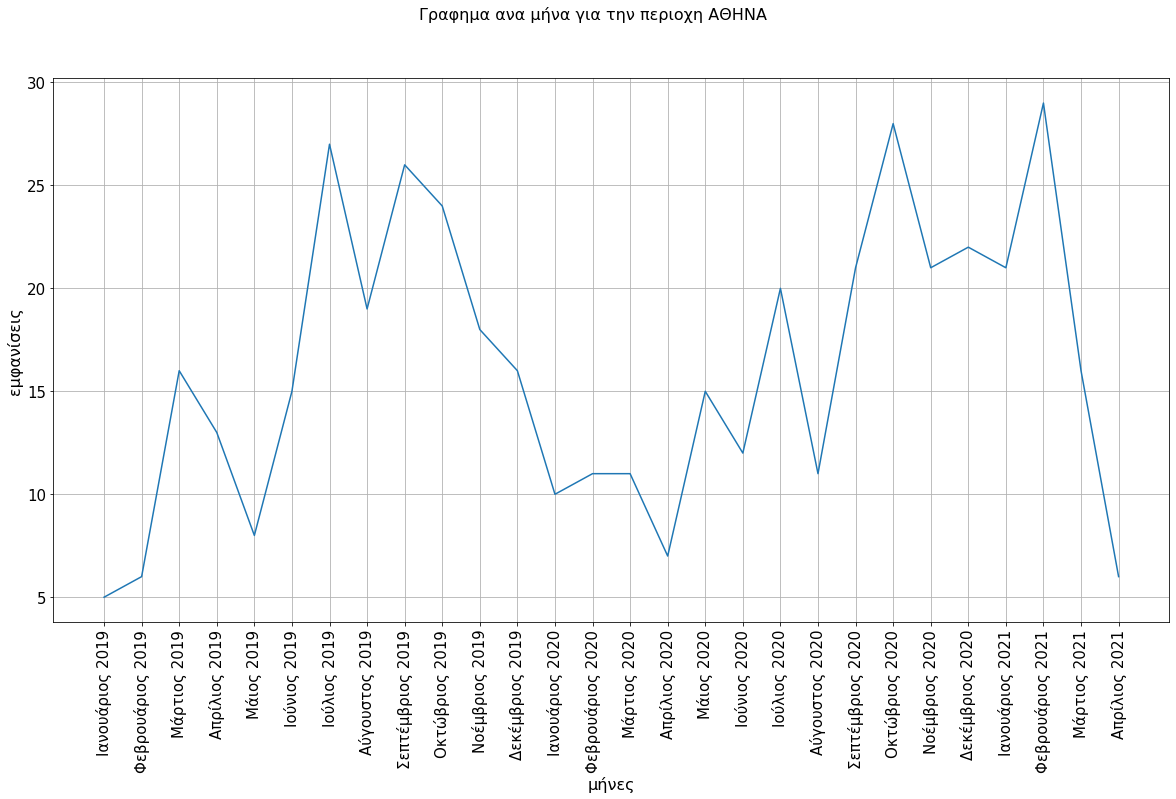

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_line(dates, graph_data, area):
  
  plt.rcParams["figure.figsize"] = (20,10)
  plt.rcParams["axes.grid"] = True
  matplotlib.rc('xtick', labelsize=15) 
  matplotlib.rc('ytick', labelsize=15) 
  fig, ax = plt.subplots()
  fig.suptitle('Γραφημα ανα μήνα για την περιοχη {}'.format(area), fontsize=16)
  plt.xlabel('μήνες', fontsize=16)
  plt.ylabel('εμφανίσεις', fontsize=16)
  ndx = [x for x in range (len(dates))]
  plt.xticks(ndx, dates, rotation='vertical')
  plt.plot( dates , graph_data)
  # plt.legend(shadow=True, fontsize="large", loc="best")
  # plt.ylim(0,1.1)   #  creates y scale from 0 to 1
  plt.show()


plot_line(dates, graph_data['ΑΘΗΝΑ'], 'ΑΘΗΝΑ')

In [ ]:
'''
TOPIC MODELING
'''

import pandas as pd
import os

li = []
for item in data:
    for report in item[1]:
        # print(type(report['title']), type(report['text']))
        res = report['title'] + ' ' + report['text']
        li.append(res)

df = pd.DataFrame(li, columns=['Titles_and_Text'])

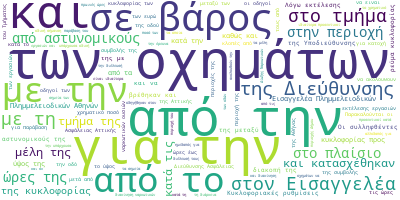

In [ ]:
from wordcloud import WordCloud

long_string = ','.join(list(df['Titles_and_Text'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [69]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# from greek_stemmer import GreekStemmer
# stemmer = GreekStemmer()
# stemmer.stem('ΘΑΛΑΣΣΑ')

In [ ]:
stop = ['μη','εαυτου','αν','αλλ’','αλλα','αλλοσ','απο','αρα','αυτοσ','δ’','δε','δη','δια','δαι','δαισ','ετι', 'εγω','εκ','εμοσ','εν','επι','εἰ','εἰμι','ειμι','εἰσ','γαρ','γε','γα^','η','η','και','κατα','μεν','μετα','ο','οδε','οσ','οστισ','οτι','ουτωσ','ουτοσ','ουτε','ουν','ουδεισ','οἱ','ου','ουδε','ουκ','περι','προσ','συ','συν','τα','τε','την','τησ','τῇ','τι','τι','τισ','τισ','το','τοι','τοιουτοσ','τον','τουσ','του','τῶν','τῷ','ὑμοσ','ὑπερ','ὑπο','ὡσ','ὦ','ὥστε','εαν','παρα','σοσ','ο','η','το','οι','τα','του','τησ','των','τον','την','και','κι','κ','ειμαι','εισαι','ειναι','ειμαστε','ειστε','στο','στον','στη','στην','μα','αλλα','απο','για','προσ','με','σε','ωσ','παρα','αντι','κατα','μετα','θα','να','δε','δεν','μη','μην','επι','ενω','εαν','αν','τοτε','που','πωσ','ποιοσ','ποια','ποιο','ποιοι','ποιεσ','ποιων','ποιουσ','αυτοσ','αυτη','αυτο','αυτοι','αυτων','αυτουσ','αυτεσ','αυτα','εκεινοσ','εκεινη','εκεινο','εκεινοι','εκεινεσ','εκεινα','εκεινων','εκεινουσ','οπωσ','ομωσ','ισωσ','οσο','οτι','Α∆ΙΑΚΟΠΑ', 'ΑΙ', 'ΑΚΟΜΑ', 'ΑΚΟΜΗ', 'ΑΚΡΙΒΩΣ', 'ΑΛΗΘΕΙΑ', 'ΑΛΗΘΙΝΑ', 'ΑΛΛΑ', 'ΑΛΛΑΧΟΥ', 'ΑΛΛΕΣ', 'ΑΛΛΗ', 'ΑΛΛΗΝ', 'ΑΛΛΗΣ', 'ΑΛΛΙΩΣ', 'ΑΛΛΙΩΤΙΚΑ', 'ΑΛΛΟ', 'ΑΛΛΟΙ', 'ΑΛΛΟΙΩΣ', 'ΑΛΛΟΙΩΤΙΚΑ', 'ΑΛΛΟΝ', 'ΑΛΛΟΣ', 'ΑΛΛΟΤΕ', 'ΑΛΛΟΥ', 'ΑΛΛΟΥΣ', 'ΑΛΛΩΝ', 'ΑΜΑ', 'ΑΜΕΣΑ', 'ΑΜΕΣΩΣ', 'ΑΝ', 'ΑΝΑ', 'ΑΝΑΜΕΣΑ', 'ΑΝΑΜΕΤΑΞΥ', 'ΑΝΕΥ', 'ΑΝΤΙ', 'ΑΝΤΙΠΕΡΑ', 'ΑΝΤΙΣ', 'ΑΝΩ', 'ΑΝΩΤΕΡΩ', 'ΑΞΑΦΝΑ', 'ΑΠ', 'ΑΠΕΝΑΝΤΙ', 'ΑΠΟ', 'ΑΠΟΨΕ', 'ΑΡΑ', 'ΑΡΑΓΕ', 'ΑΡΓΑ', 'ΑΡΓΟΤΕΡΟ', 'ΑΡΙΣΤΕΡΑ', 'ΑΡΚΕΤΑ', 'ΑΡΧΙΚΑ', 'ΑΣ', 'ΑΥΡΙΟ', 'ΑΥΤΑ', 'ΑΥΤΕΣ', 'ΑΥΤΗ', 'ΑΥΤΗΝ', 'ΑΥΤΗΣ', 'ΑΥΤΟ', 'ΑΥΤΟΙ', 'ΑΥΤΟΝ', 'ΑΥΤΟΣ', 'ΑΥΤΟΥ', 'ΑΥΤΟΥΣ', 'ΑΥΤΩΝ', 'ΑΦΟΤΟΥ', 'ΑΦΟΥ', 'ΒΕΒΑΙΑ', 'ΒΕΒΑΙΟΤΑΤΑ', 'ΓΙ', 'ΓΙΑ', 'ΓΡΗΓΟΡΑ', 'ΓΥΡΩ', '∆Α', '∆Ε', '∆ΕΙΝΑ', '∆ΕΝ', '∆ΕΞΙΑ', '∆ΗΘΕΝ', '∆ΗΛΑ∆Η', '∆Ι', '∆ΙΑ', '∆ΙΑΡΚΩΣ', '∆ΙΚΑ', '∆ΙΚΟ', '∆ΙΚΟΙ', '∆ΙΚΟΣ', '∆ΙΚΟΥ', '∆ΙΚΟΥΣ', '∆ΙΟΛΟΥ', '∆ΙΠΛΑ', '∆ΙΧΩΣ', 'ΕΑΝ', 'ΕΑΥΤΟ', 'ΕΑΥΤΟΝ', 'ΕΑΥΤΟΥ', 'ΕΑΥΤΟΥΣ', 'ΕΑΥΤΩΝ', 'ΕΓΚΑΙΡΑ', 'ΕΓΚΑΙΡΩΣ', 'ΕΓΩ', 'Ε∆Ω', 'ΕΙ∆ΕΜΗ', 'ΕΙΘΕ', 'ΕΙΜΑΙ', 'ΕΙΜΑΣΤΕ', 'ΕΙΝΑΙ', 'ΕΙΣ', 'ΕΙΣΑΙ', 'ΕΙΣΑΣΤΕ', 'ΕΙΣΤΕ', 'ΕΙΤΕ', 'ΕΙΧΑ', 'ΕΙΧΑΜΕ', 'ΕΙΧΑΝ', 'ΕΙΧΑΤΕ', 'ΕΙΧΕ', 'ΕΙΧΕΣ', 'ΕΚΑΣΤΑ', 'ΕΚΑΣΤΕΣ', 'ΕΚΑΣΤΗ', 'ΕΚΑΣΤΗΝ', 'ΕΚΑΣΤΗΣ', 'ΕΚΑΣΤΟ', 'ΕΚΑΣΤΟΙ', 'ΕΚΑΣΤΟΝ', 'ΕΚΑΣΤΟΣ', 'ΕΚΑΣΤΟΥ', 'ΕΚΑΣΤΟΥΣ', 'ΕΚΑΣΤΩΝ', 'ΕΚΕΙ', 'ΕΚΕΙΝΑ', 'ΕΚΕΙΝΕΣ', 'ΕΚΕΙΝΗ', 'ΕΚΕΙΝΗΝ', 'ΕΚΕΙΝΗΣ', 'ΕΚΕΙΝΟ', 'ΕΚΕΙΝΟΙ', 'ΕΚΕΙΝΟΝ', 'ΕΚΕΙΝΟΣ', 'ΕΚΕΙΝΟΥ', 'ΕΚΕΙΝΟΥΣ', 'ΕΚΕΙΝΩΝ', 'ΕΚΤΟΣ', 'ΕΜΑΣ', 'ΕΜΕΙΣ', 'ΕΜΕΝΑ', 'ΕΜΠΡΟΣ', 'ΕΝ', 'ΕΝΑ', 'ΕΝΑΝ', 'ΕΝΑΣ', 'ΕΝΟΣ', 'ΕΝΤΕΛΩΣ', 'ΕΝΤΟΣ', 'ΕΝΤΩΜΕΤΑΞΥ', 'ΕΝΩ', 'ΕΞ', 'ΕΞΑΦΝΑ', 'ΕΞΗΣ', 'ΕΞΙΣΟΥ', 'ΕΞΩ', 'ΕΠΑΝΩ', 'ΕΠΕΙ∆Η', 'ΕΠΕΙΤΑ', 'ΕΠΙ', 'ΕΠΙΣΗΣ', 'ΕΠΟΜΕΝΩΣ', 'ΕΣΑΣ', 'ΕΣΕΙΣ', 'ΕΣΕΝΑ', 'ΕΣΤΩ', 'ΕΣΥ', 'ΕΤΕΡΑ', 'ΕΤΕΡΑΙ', 'ΕΤΕΡΑΣ', 'ΕΤΕΡΕΣ', 'ΕΤΕΡΗ', 'ΕΤΕΡΗΣ', 'ΕΤΕΡΟ', 'ΕΤΕΡΟΙ', 'ΕΤΕΡΟΝ', 'ΕΤΕΡΟΣ', 'ΕΤΕΡΟΥ', 'ΕΤΕΡΟΥΣ', 'ΕΤΕΡΩΝ', 'ΕΤΟΥΤΑ', 'ΕΤΟΥΤΕΣ', 'ΕΤΟΥΤΗ', 'ΕΤΟΥΤΗΝ', 'ΕΤΟΥΤΗΣ', 'ΕΤΟΥΤΟ', 'ΕΤΟΥΤΟΙ', 'ΕΤΟΥΤΟΝ', 'ΕΤΟΥΤΟΣ', 'ΕΤΟΥΤΟΥ', 'ΕΤΟΥΤΟΥΣ', 'ΕΤΟΥΤΩΝ', 'ΕΤΣΙ', 'ΕΥΓΕ', 'ΕΥΘΥΣ', 'ΕΥΤΥΧΩΣ', 'ΕΦΕΞΗΣ', 'ΕΧΕΙ', 'ΕΧΕΙΣ', 'ΕΧΕΤΕ', 'ΕΧΘΕΣ', 'ΕΧΟΜΕ', 'ΕΧΟΥΜΕ', 'ΕΧΟΥΝ', 'ΕΧΤΕΣ', 'ΕΧΩ', 'ΕΩΣ', 'Η', 'Η∆Η', 'ΗΜΑΣΤΑΝ', 'ΗΜΑΣΤΕ', 'ΗΜΟΥΝ', 'ΗΣΑΣΤΑΝ', 'ΗΣΑΣΤΕ', 'ΗΣΟΥΝ', 'ΗΤΑΝ', 'ΗΤΑΝΕ', 'ΗΤΟΙ', 'ΗΤΤΟΝ', 'ΘΑ', 'Ι', 'Ι∆ΙΑ', 'Ι∆ΙΑΝ', 'Ι∆ΙΑΣ', 'Ι∆ΙΕΣ', 'Ι∆ΙΟ', 'Ι∆ΙΟΙ', 'Ι∆ΙΟΝ', 'Ι∆ΙΟΣ', 'Ι∆ΙΟΥ', 'Ι∆ΙΟΥΣ', 'Ι∆ΙΩΝ', 'Ι∆ΙΩΣ', 'ΙΙ', 'ΙΙΙ', 'ΙΣΑΜΕ', 'ΙΣΙΑ', 'ΙΣΩΣ', 'ΚΑΘΕ', 'ΚΑΘΕΜΙΑ', 'ΚΑΘΕΜΙΑΣ', 'ΚΑΘΕΝΑ', 'ΚΑΘΕΝΑΣ', 'ΚΑΘΕΝΟΣ', 'ΚΑΘΕΤΙ', 'ΚΑΘΟΛΟΥ', 'ΚΑΘΩΣ', 'ΚΑΙ', 'ΚΑΚΑ', 'ΚΑΚΩΣ', 'ΚΑΛΑ', 'ΚΑΛΩΣ', 'ΚΑΜΙΑ', 'ΚΑΜΙΑΝ', 'ΚΑΜΙΑΣ', 'ΚΑΜΠΟΣΑ', 'ΚΑΜΠΟΣΕΣ', 'ΚΑΜΠΟΣΗ', 'ΚΑΜΠΟΣΗΝ', 'ΚΑΜΠΟΣΗΣ', 'ΚΑΜΠΟΣΟ', 'ΚΑΜΠΟΣΟΙ', 'ΚΑΜΠΟΣΟΝ', 'ΚΑΜΠΟΣΟΣ', 'ΚΑΜΠΟΣΟΥ', 'ΚΑΜΠΟΣΟΥΣ', 'ΚΑΜΠΟΣΩΝ', 'ΚΑΝΕΙΣ', 'ΚΑΝΕΝ', 'ΚΑΝΕΝΑ', 'ΚΑΝΕΝΑΝ', 'ΚΑΝΕΝΑΣ', 'ΚΑΝΕΝΟΣ', 'ΚΑΠΟΙΑ', 'ΚΑΠΟΙΑΝ', 'ΚΑΠΟΙΑΣ', 'ΚΑΠΟΙΕΣ', 'ΚΑΠΟΙΟ', 'ΚΑΠΟΙΟΙ', 'ΚΑΠΟΙΟΝ', 'ΚΑΠΟΙΟΣ', 'ΚΑΠΟΙΟΥ', 'ΚΑΠΟΙΟΥΣ', 'ΚΑΠΟΙΩΝ', 'ΚΑΠΟΤΕ', 'ΚΑΠΟΥ', 'ΚΑΠΩΣ', 'ΚΑΤ', 'ΚΑΤΑ', 'ΚΑΤΙ', 'ΚΑΤΙΤΙ', 'ΚΑΤΟΠΙΝ', 'ΚΑΤΩ', 'ΚΙΟΛΑΣ', 'ΚΛΠ', 'ΚΟΝΤΑ', 'ΚΤΛ', 'ΚΥΡΙΩΣ', 'ΛΙΓΑΚΙ', 'ΛΙΓΟ', 'ΛΙΓΩΤΕΡΟ', 'ΛΟΓΩ', 'ΛΟΙΠΑ', 'ΛΟΙΠΟΝ', 'ΜΑ', 'ΜΑΖΙ', 'ΜΑΚΑΡΙ', 'ΜΑΚΡΥΑ', 'ΜΑΛΙΣΤΑ', 'ΜΑΛΛΟΝ', 'ΜΑΣ', 'ΜΕ', 'ΜΕΘΑΥΡΙΟ', 'ΜΕΙΟΝ', 'ΜΕΛΕΙ', 'ΜΕΛΛΕΤΑΙ', 'ΜΕΜΙΑΣ', 'ΜΕΝ', 'ΜΕΡΙΚΑ', 'ΜΕΡΙΚΕΣ', 'ΜΕΡΙΚΟΙ', 'ΜΕΡΙΚΟΥΣ', 'ΜΕΡΙΚΩΝ', 'ΜΕΣΑ', 'ΜΕΤ', 'ΜΕΤΑ', 'ΜΕΤΑΞΥ', 'ΜΕΧΡΙ', 'ΜΗ', 'ΜΗ∆Ε', 'ΜΗΝ', 'ΜΗΠΩΣ', 'ΜΗΤΕ', 'ΜΙΑ', 'ΜΙΑΝ', 'ΜΙΑΣ', 'ΜΟΛΙΣ', 'ΜΟΛΟΝΟΤΙ', 'ΜΟΝΑΧΑ', 'ΜΟΝΕΣ', 'ΜΟΝΗ', 'ΜΟΝΗΝ', 'ΜΟΝΗΣ', 'ΜΟΝΟ', 'ΜΟΝΟΙ', 'ΜΟΝΟΜΙΑΣ', 'ΜΟΝΟΣ', 'ΜΟΝΟΥ', 'ΜΟΝΟΥΣ', 'ΜΟΝΩΝ', 'ΜΟΥ', 'ΜΠΟΡΕΙ', 'ΜΠΟΡΟΥΝ', 'ΜΠΡΑΒΟ', 'ΜΠΡΟΣ', 'ΝΑ', 'ΝΑΙ', 'ΝΩΡΙΣ', 'ΞΑΝΑ', 'ΞΑΦΝΙΚΑ', 'Ο', 'ΟΙ', 'ΟΛΑ', 'ΟΛΕΣ', 'ΟΛΗ', 'ΟΛΗΝ', 'ΟΛΗΣ', 'ΟΛΟ', 'ΟΛΟΓΥΡΑ', 'ΟΛΟΙ', 'ΟΛΟΝ', 'ΟΛΟΝΕΝ', 'ΟΛΟΣ', 'ΟΛΟΤΕΛΑ', 'ΟΛΟΥ', 'ΟΛΟΥΣ', 'ΟΛΩΝ', 'ΟΛΩΣ', 'ΟΛΩΣ∆ΙΟΛΟΥ', 'ΟΜΩΣ', 'ΟΠΟΙΑ', 'ΟΠΟΙΑ∆ΗΠΟΤΕ', 'ΟΠΟΙΑΝ', 'ΟΠΟΙΑΝ∆ΗΠΟΤΕ', 'ΟΠΟΙΑΣ', 'ΟΠΟΙΑΣ∆ΗΠΟΤΕ', 'ΟΠΟΙ∆ΗΠΟΤΕ', 'ΟΠΟΙΕΣ', 'ΟΠΟΙΕΣ∆ΗΠΟΤΕ', 'ΟΠΟΙΟ', 'ΟΠΟΙΟ∆ΗΠΟΤΕ', 'ΟΠΟΙΟΙ', 'ΟΠΟΙΟΝ', 'ΟΠΟΙΟΝ∆ΗΠΟΤΕ', 'ΟΠΟΙΟΣ', 'ΟΠΟΙΟΣ∆ΗΠΟΤΕ', 'ΟΠΟΙΟΥ', 'ΟΠΟΙΟΥ∆ΗΠΟΤΕ', 'ΟΠΟΙΟΥΣ', 'ΟΠΟΙΟΥΣ∆ΗΠΟΤΕ', 'ΟΠΟΙΩΝ', 'ΟΠΟΙΩΝ∆ΗΠΟΤΕ', 'ΟΠΟΤΕ', 'ΟΠΟΤΕ∆ΗΠΟΤΕ', 'ΟΠΟΥ', 'ΟΠΟΥ∆ΗΠΟΤΕ', 'ΟΠΩΣ', 'ΟΡΙΣΜΕΝΑ', 'ΟΡΙΣΜΕΝΕΣ', 'ΟΡΙΣΜΕΝΩΝ', 'ΟΡΙΣΜΕΝΩΣ', 'ΟΣΑ', 'ΟΣΑ∆ΗΠΟΤΕ', 'ΟΣΕΣ', 'ΟΣΕΣ∆ΗΠΟΤΕ', 'ΟΣΗ', 'ΟΣΗ∆ΗΠΟΤΕ', 'ΟΣΗΝ', 'ΟΣΗΝ∆ΗΠΟΤΕ', 'ΟΣΗΣ', 'ΟΣΗΣ∆ΗΠΟΤΕ', 'ΟΣΟ', 'ΟΣΟ∆ΗΠΟΤΕ', 'ΟΣΟΙ', 'ΟΣΟΙ∆ΗΠΟΤΕ', 'ΟΣΟΝ', 'ΟΣΟΝ∆ΗΠΟΤΕ', 'ΟΣΟΣ', 'ΟΣΟΣ∆ΗΠΟΤΕ', 'ΟΣΟΥ', 'ΟΣΟΥ∆ΗΠΟΤΕ', 'ΟΣΟΥΣ', 'ΟΣΟΥΣ∆ΗΠΟΤΕ', 'ΟΣΩΝ', 'ΟΣΩΝ∆ΗΠΟΤΕ', 'ΟΤΑΝ', 'ΟΤΙ', 'ΟΤΙ∆ΗΠΟΤΕ', 'ΟΤΟΥ', 'ΟΥ', 'ΟΥ∆Ε', 'ΟΥΤΕ', 'ΟΧΙ', 'ΠΑΛΙ', 'ΠΑΝΤΟΤΕ', 'ΠΑΝΤΟΥ', 'ΠΑΝΤΩΣ', 'ΠΑΡΑ', 'ΠΕΡΑ', 'ΠΕΡΙ', 'ΠΕΡΙΠΟΥ', 'ΠΕΡΙΣΣΟΤΕΡΟ', 'ΠΕΡΣΙ', 'ΠΕΡΥΣΙ', 'ΠΙΑ', 'ΠΙΘΑΝΟΝ', 'ΠΙΟ', 'ΠΙΣΩ', 'ΠΛΑΙ', 'ΠΛΕΟΝ', 'ΠΛΗΝ', 'ΠΟΙΑ', 'ΠΟΙΑΝ', 'ΠΟΙΑΣ', 'ΠΟΙΕΣ', 'ΠΟΙΟ', 'ΠΟΙΟΙ', 'ΠΟΙΟΝ', 'ΠΟΙΟΣ', 'ΠΟΙΟΥ', 'ΠΟΙΟΥΣ', 'ΠΟΙΩΝ', 'ΠΟΛΥ', 'ΠΟΣΕΣ', 'ΠΟΣΗ', 'ΠΟΣΗΝ', 'ΠΟΣΗΣ', 'ΠΟΣΟΙ', 'ΠΟΣΟΣ', 'ΠΟΣΟΥΣ', 'ΠΟΤΕ', 'ΠΟΥ', 'ΠΟΥΘΕ', 'ΠΟΥΘΕΝΑ', 'ΠΡΕΠΕΙ', 'ΠΡΙΝ', 'ΠΡΟ', 'ΠΡΟΚΕΙΜΕΝΟΥ', 'ΠΡΟΚΕΙΤΑΙ', 'ΠΡΟΠΕΡΣΙ', 'ΠΡΟΣ', 'ΠΡΟΤΟΥ', 'ΠΡΟΧΘΕΣ', 'ΠΡΟΧΤΕΣ', 'ΠΡΩΤΥΤΕΡΑ', 'ΠΩΣ', 'ΣΑΝ', 'ΣΑΣ', 'ΣΕ', 'ΣΕΙΣ', 'ΣΗΜΕΡΑ', 'ΣΙΓΑ', 'ΣΟΥ', 'ΣΤΑ', 'ΣΤΗ', 'ΣΤΗΝ', 'ΣΤΗΣ', 'ΣΤΙΣ', 'ΣΤΟ', 'ΣΤΟΝ', 'ΣΤΟΥ', 'ΣΤΟΥΣ', 'ΣΤΩΝ', 'ΣΥΓΧΡΟΝΩΣ', 'ΣΥΝ', 'ΣΥΝΑΜΑ', 'ΣΥΝΕΠΩΣ', 'ΣΥΝΗΘΩΣ', 'ΣΥΧΝΑ', 'ΣΥΧΝΑΣ', 'ΣΥΧΝΕΣ', 'ΣΥΧΝΗ', 'ΣΥΧΝΗΝ', 'ΣΥΧΝΗΣ', 'ΣΥΧΝΟ', 'ΣΥΧΝΟΙ', 'ΣΥΧΝΟΝ', 'ΣΥΧΝΟΣ', 'ΣΥΧΝΟΥ', 'ΣΥΧΝΟΥ', 'ΣΥΧΝΟΥΣ', 'ΣΥΧΝΩΝ', 'ΣΥΧΝΩΣ', 'ΣΧΕ∆ΟΝ', 'ΣΩΣΤΑ', 'ΤΑ', 'ΤΑ∆Ε', 'ΤΑΥΤΑ', 'ΤΑΥΤΕΣ', 'ΤΑΥΤΗ', 'ΤΑΥΤΗΝ', 'ΤΑΥΤΗΣ', 'ΤΑΥΤΟ', 'ΤΑΥΤΟΝ', 'ΤΑΥΤΟΣ', 'ΤΑΥΤΟΥ', 'ΤΑΥΤΩΝ', 'ΤΑΧΑ', 'ΤΑΧΑΤΕ', 'ΤΕΛΙΚΑ', 'ΤΕΛΙΚΩΣ', 'ΤΕΣ', 'ΤΕΤΟΙΑ', 'ΤΕΤΟΙΑΝ', 'ΤΕΤΟΙΑΣ', 'ΤΕΤΟΙΕΣ', 'ΤΕΤΟΙΟ', 'ΤΕΤΟΙΟΙ', 'ΤΕΤΟΙΟΝ', 'ΤΕΤΟΙΟΣ', 'ΤΕΤΟΙΟΥ', 'ΤΕΤΟΙΟΥΣ', 'ΤΕΤΟΙΩΝ', 'ΤΗ', 'ΤΗΝ', 'ΤΗΣ', 'ΤΙ', 'ΤΙΠΟΤΑ', 'ΤΙΠΟΤΕ', 'ΤΙΣ', 'ΤΟ', 'ΤΟΙ', 'ΤΟΝ', 'ΤΟΣ', 'ΤΟΣΑ', 'ΤΟΣΕΣ', 'ΤΟΣΗ', 'ΤΟΣΗΝ', 'ΤΟΣΗΣ', 'ΤΟΣΟ', 'ΤΟΣΟΙ', 'ΤΟΣΟΝ', 'ΤΟΣΟΣ', 'ΤΟΣΟΥ', 'ΤΟΣΟΥΣ', 'ΤΟΣΩΝ', 'ΤΟΤΕ', 'ΤΟΥ', 'ΤΟΥΛΑΧΙΣΤΟ', 'ΤΟΥΛΑΧΙΣΤΟΝ', 'ΤΟΥΣ', 'ΤΟΥΤΑ', 'ΤΟΥΤΕΣ', 'ΤΟΥΤΗ', 'ΤΟΥΤΗΝ', 'ΤΟΥΤΗΣ', 'ΤΟΥΤΟ', 'ΤΟΥΤΟΙ', 'ΤΟΥΤΟΙΣ', 'ΤΟΥΤΟΝ', 'ΤΟΥΤΟΣ', 'ΤΟΥΤΟΥ', 'ΤΟΥΤΟΥΣ', 'ΤΟΥΤΩΝ', 'ΤΥΧΟΝ', 'ΤΩΝ', 'ΤΩΡΑ', 'ΥΠ', 'ΥΠΕΡ', 'ΥΠΟ', 'ΥΠΟΨΗ', 'ΥΠΟΨΙΝ', 'ΥΣΤΕΡΑ', 'ΦΕΤΟΣ', 'ΧΑΜΗΛΑ', 'ΧΘΕΣ', 'ΧΤΕΣ', 'ΧΩΡΙΣ', 'ΧΩΡΙΣΤΑ', 'ΨΗΛΑ', 'Ω', 'ΩΡΑΙΑ', 'ΩΣ', 'ΩΣΑΝ', 'ΩΣΟΤΟΥ', 'ΩΣΠΟΥ', 'ΩΣΤΕ', 'ΩΣΤΟΣΟ', 'ΩΧ', 'απ', 'απο', 'γι', 'για', 'δι', 'δια', 'εις', 'εκ', 'ενα', 'εναν', 'ενας', 'ενος', 'εξ', 'επ', 'επι', 'καθ', 'και', 'κατ', 'κατα', 'με', 'μεσα', 'μια', 'μια', 'μια', 'μιαν', 'μιας', 'περι', 'σε', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον', 'στους', 'τα', 'τη', 'την', 'της', 'τις', 'το', 'τον', 'του', 'τους', 'των', 'υπο']
stopwords2 = []
for word in stop:
  stopwords2.append(word)
len(stopwords2)

833

In [ ]:
!pip install greek-stemmer

  Created wheel for greek-stemmer: filename=greek_stemmer-0.1.1-cp37-none-any.whl size=6738 sha256=bbe1b62d43e21edaf0ac2fdc018130a32f4811b51a84ea90f7d07cf9c7b7f7e6
  Stored in directory: /root/.cache/pip/wheels/b9/e5/39/735c9926a0da4bc26812631945f8394a697baf31d0423d154a
Successfully built greek-stemmer


In [ ]:
from greek_stemmer import GreekStemmer
stemmer = GreekStemmer()

# stop_words = stopwords.words('greek')

def is_greek(word):
    if word >= 'Α':
        return True
    return False


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    stemmed_words = []
    for doc in texts:
        li = []
        for word in simple_preprocess(str(doc)):
            if (is_greek(word) and word not in stopwords2):
                 li.append(stemmer.stem(word.upper()))
        
        stemmed_words.append(li)
    return stemmed_words        
    # return [[stemmer.stem(word) for word in simple_preprocess(str(doc)) if (is_greek(word) and word not in stopwords2)] for doc in texts]

data = df.Titles_and_Text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['ΚΥΚΛΟΦΟΡΙΑΚ', 'ΡΥΘΜΙΣ', 'ΟΔ', 'ΧΑΜΟΣΤΕΡΝ', 'ΠΕΙΡΑΙΩΣ', 'ΛΟΓ', 'ΕΡΓΑΣ', 'ΛΟΓ', 'ΕΚΤΕΛΕΣ', 'ΕΡΓΑΣ', 'ΩΡ', 'ΕΩΣ', 'ΠΡΑΓΜΑΤΟΠΟΙ', 'ΠΡΟΣΩΡΙΝ', 'ΤΜΗΜΑΤ', 'ΔΙΑΚΟΠ', 'ΚΥΚΛΟΦΟΡ', 'ΟΧΗΜ', 'ΠΑΡΑΚΑΤ', 'ΟΔ', 'ΤΜΗΜ', 'ΠΕΡΙΟΧ', 'ΔΗΜ', 'ΑΘΗΝΑΙ', 'ΜΟΣΧΑΤ', 'ΤΑΥΡ', 'ΩΣ', 'ΕΞΗΣ', 'ΑΡΙΣΤΕΡ', 'ΛΩΡΙΔ']


In [ ]:
for i in range(5):
  print(data_words[i])
  print(data[i])
  print(40 * '-')

['κυκλοφοριακες', 'ρυθμισεις', 'στις', 'οδους', 'χαμοστερνας', 'πειραιως', 'λογω', 'εργασιων']
31-01-2021: κυκλοφοριακές ρυθμίσεις στις οδούς χαμοστέρνας και πειραιώς λόγω εργασιών
----------------------------------------
['κυκλοφοριακες', 'ρυθμισεις', 'αθηνων', 'λαμιας', 'λογω', 'εργασιων']
31-01-2021: κυκλοφοριακές ρυθμίσεις στη ν.ε.ο. αθηνών - λαμίας λόγω εργασιών
----------------------------------------
['δελτιο', 'τυπου', 'αττικης', 'σχετικα', 'συλληψη', 'χρονου', 'αλλοδαπου', 'οποιος', 'ενεχεται', 'υποθεση', 'ανθρωποκτονιας', 'αποπειρας', 'ανθρωποκτονιας', 'εξω', 'μπαρ', 'γλυφαδα', 'οκτωβρη']
31-01-2021: δελτίο τύπου γ.ε.δ. αττικής σχετικά με σύλληψη 45χρονου αλλοδαπού,ο οποίος ενέχεται σε υπόθεση ανθρωποκτονίας και απόπειρας ανθρωποκτονίας έξω από μπαρ στη γλυφάδα τον οκτώβρη του 2017
----------------------------------------
['κυκλοφοριακες', 'ρυθμισεις', 'λογω', 'εργασιων', 'αναπλασης', 'φαληρικου', 'ορμου']
30-01-2021: κυκλοφοριακές ρυθμίσεις λόγω εργασιών ανάπλασης του φαληρι

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 3), (15, 1), (16, 7), (17, 1), (18, 2), (19, 3), (20, 3), (21, 1), (22, 3), (23, 1), (24, 11), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


In [ ]:
pprint(li)

['31-01-2021: Κυκλοφοριακές ρυθμίσεις στις οδούς Χαμοστέρνας και Πειραιώς λόγω '
 'εργασιών',
 '31-01-2021: Κυκλοφοριακές ρυθμίσεις στη Ν.Ε.Ο. Αθηνών - Λαμίας λόγω εργασιών',
 '31-01-2021: Δελτίο Τύπου Γ.Ε.Δ. Αττικής σχετικά με σύλληψη 45χρονου '
 'αλλοδαπού,ο οποίος ενέχεται σε υπόθεση ανθρωποκτονίας και απόπειρας '
 'ανθρωποκτονίας έξω από μπαρ στη Γλυφάδα τον Οκτώβρη του 2017',
 '30-01-2021: Κυκλοφοριακές ρυθμίσεις λόγω εργασιών ανάπλασης του Φαληρικού '
 'Όρμου',
 '30-01-2021: Κυκλοφοριακές ρυθμίσεις στην οδό Αθηνάς λόγω εργασιών',
 '29-01-2021: Ανακοίνωση Γ.Ε.Δ. Αττικής σχετικά με σημερινή συγκέντρωση στο '
 'κέντρο της Αθήνας',
 '29-01-2021: Εξιχνιάσθηκε η ανθρωποκτονία 64χρονου ημεδαπού, η σορός του '
 'οποίου βρέθηκε την 1-1-2021 στην περιοχή Αγριλέζα Λαυρίου',
 '27-01-2021: Συνελήφθη 26χρονος ημεδαπός για κατοχή προς διακίνηση ναρκωτικών '
 'ουσιών',
 '26-01-2021: Επιχείρηση της Δίωξης Ναρκωτικών στον προαύλιο και περιβάλλοντα '
 'χώρο των φοιτητικών εστιών του Πανεπιστημίου Α

In [ ]:
for item, i in zip(data_words, range(len(data_words))):
    print('Text: {}  words: {}'.format(i,item))
print(40 * '-')
for item, i in zip(corpus, range(len(corpus))):
    print('Text: {}  words: {}'.format(i,item))

Text: 0  words: ['ΚΥΚΛΟΦΟΡΙΑΚ', 'ΡΥΘΜΙΣ', 'ΟΔ', 'ΧΑΜΟΣΤΕΡΝ', 'ΠΕΙΡΑΙΩΣ', 'ΛΟΓ', 'ΕΡΓΑΣ']
Text: 1  words: ['ΚΥΚΛΟΦΟΡΙΑΚ', 'ΡΥΘΜΙΣ', 'ΑΘΗΝ', 'ΛΑΜ', 'ΛΟΓ', 'ΕΡΓΑΣ']
Text: 2  words: ['ΔΕΛΤ', 'ΤΥΠ', 'ΑΤΤΙΚ', 'ΣΧΕΤ', 'ΣΥΛΛΗΨ', 'ΧΡΟΝ', 'ΑΛΛΟΔΑΠ', 'ΟΠΟΙ', 'ΕΝΕΧ', 'ΥΠΟΘΕΣ', 'ΑΝΘΡΩΠΟΚΤΟΝ', 'ΑΠΟΠΕΙΡ', 'ΑΝΘΡΩΠΟΚΤΟΝ', 'ΕΞΩ', 'ΜΠΑΡ', 'ΓΛΥΦΑΔ', 'ΟΚΤΩΒΡ']
Text: 3  words: ['ΚΥΚΛΟΦΟΡΙΑΚ', 'ΡΥΘΜΙΣ', 'ΛΟΓ', 'ΕΡΓΑΣ', 'ΑΝΑΠΛΑΣ', 'ΦΑΛΗΡ', 'ΟΡΜ']
Text: 4  words: ['ΚΥΚΛΟΦΟΡΙΑΚ', 'ΡΥΘΜΙΣ', 'ΟΔ', 'ΑΘΗΝ', 'ΛΟΓ', 'ΕΡΓΑΣ']
Text: 5  words: ['ΑΝΑΚΟΙΝΩΣ', 'ΑΤΤΙΚ', 'ΣΧΕΤ', 'ΣΗΜΕΡΙΝ', 'ΣΥΓΚΕΝΤΡΩΣ', 'ΚΕΝΤΡ', 'ΑΘΗΝ']
Text: 6  words: ['ΕΞΙΧΝΙΑΣΘ', 'ΑΝΘΡΩΠΟΚΤΟΝ', 'ΧΡΟΝ', 'ΗΜΕΔΑΠ', 'ΣΟΡ', 'ΟΠΟΙ', 'ΒΡΕΘ', 'ΠΕΡΙΟΧ', 'ΑΓΡΙΛΕΖ', 'ΛΑΥΡ']
Text: 7  words: ['ΣΥΝΕΛΗΦΘ', 'ΧΡΟΝ', 'ΗΜΕΔΑΠ', 'ΚΑΤΟΧ', 'ΠΡΟΣ', 'ΔΙΑΚΙΝΗΣ', 'ΝΑΡΚΩΤ', 'ΟΥΣ']
Text: 8  words: ['ΕΠΙΧΕΙΡΗΣ', 'ΔΙΩΞ', 'ΝΑΡΚΩΤ', 'ΠΡΟΑΥΛ', 'ΠΕΡΙΒΑΛΛΟΝΤ', 'ΧΩΡ', 'ΦΟΙΤΗΤ', 'ΕΣΤ', 'ΠΑΝΕΠΙΣΤΗΜ', 'ΑΘΗΝ', 'ΣΤ', 'ΖΩΓΡΑΦ']
Text: 9  words: ['ΣΥΝΕΛΗΦΘ', 'ΤΕΣΣΕΡΙΣ', 'ΗΜΕΔΑΠ', 'ΚΑΤΗΓΟΡΟΥΜΕΝ', 'Ω

In [ ]:
len(corpus)

10

In [ ]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]
pprint(id_words)

[[('ΕΡΓΑΣ', 1),
  ('ΚΥΚΛΟΦΟΡΙΑΚ', 1),
  ('ΛΟΓ', 1),
  ('ΟΔ', 1),
  ('ΠΕΙΡΑΙΩΣ', 1),
  ('ΡΥΘΜΙΣ', 1),
  ('ΧΑΜΟΣΤΕΡΝ', 1)],
 [('ΕΡΓΑΣ', 1),
  ('ΚΥΚΛΟΦΟΡΙΑΚ', 1),
  ('ΛΟΓ', 1),
  ('ΡΥΘΜΙΣ', 1),
  ('ΑΘΗΝ', 1),
  ('ΛΑΜ', 1)],
 [('ΑΛΛΟΔΑΠ', 1),
  ('ΑΝΘΡΩΠΟΚΤΟΝ', 2),
  ('ΑΠΟΠΕΙΡ', 1),
  ('ΑΤΤΙΚ', 1),
  ('ΓΛΥΦΑΔ', 1),
  ('ΔΕΛΤ', 1),
  ('ΕΝΕΧ', 1),
  ('ΕΞΩ', 1),
  ('ΜΠΑΡ', 1),
  ('ΟΚΤΩΒΡ', 1),
  ('ΟΠΟΙ', 1),
  ('ΣΥΛΛΗΨ', 1),
  ('ΣΧΕΤ', 1),
  ('ΤΥΠ', 1),
  ('ΥΠΟΘΕΣ', 1),
  ('ΧΡΟΝ', 1)],
 [('ΕΡΓΑΣ', 1),
  ('ΚΥΚΛΟΦΟΡΙΑΚ', 1),
  ('ΛΟΓ', 1),
  ('ΡΥΘΜΙΣ', 1),
  ('ΑΝΑΠΛΑΣ', 1),
  ('ΟΡΜ', 1),
  ('ΦΑΛΗΡ', 1)],
 [('ΕΡΓΑΣ', 1),
  ('ΚΥΚΛΟΦΟΡΙΑΚ', 1),
  ('ΛΟΓ', 1),
  ('ΟΔ', 1),
  ('ΡΥΘΜΙΣ', 1),
  ('ΑΘΗΝ', 1)],
 [('ΑΘΗΝ', 1),
  ('ΑΤΤΙΚ', 1),
  ('ΣΧΕΤ', 1),
  ('ΑΝΑΚΟΙΝΩΣ', 1),
  ('ΚΕΝΤΡ', 1),
  ('ΣΗΜΕΡΙΝ', 1),
  ('ΣΥΓΚΕΝΤΡΩΣ', 1)],
 [('ΑΝΘΡΩΠΟΚΤΟΝ', 1),
  ('ΟΠΟΙ', 1),
  ('ΧΡΟΝ', 1),
  ('ΑΓΡΙΛΕΖ', 1),
  ('ΒΡΕΘ', 1),
  ('ΕΞΙΧΝΙΑΣΘ', 1),
  ('ΗΜΕΔΑΠ', 1),
  ('ΛΑΥΡ', 1),
  ('ΠΕΡΙΟΧ', 1),
  ('ΣΟΡ', 1)],
 [('ΧΡΟΝ', 

In [ ]:
from pprint import pprint
from gensim.models import CoherenceModel

lda_model = None

# number of topics
# for num_topics in range(2,21):
num_topics =8
# Build LDA model
temp_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=temp_model, texts=data_words, dictionary=id2word, coherence='c_v')
temp_lda = coherence_model_lda.get_coherence()

if not lda_model or temp_lda > coherence_lda:
    lda_model = temp_model
    coherence_lda = temp_lda
    best_num_topics = num_topics
# elif temp_lda > coherence_lda:

print('num_topics: ', best_num_topics, '  Coherence Score: ', coherence_lda)


num_topics:  8   Coherence Score:  0.4202047902959535


In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install vega
!pip install altair

     |████████████████████████████████| 1.7MB 8.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 11.4MB/s 
     |████████████████████████████████| 15.3MB 306kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=6bd73bd979d11df74450a047e5d47175708996472d5cd9e02fb0f020f006d51f
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

     |████████████████████████████████| 1.3MB 7.8MB/s 


In [ ]:
imUsingColab = True

try:
    import altair as alt
    if imUsingColab:
        alt.renderers.enable('colab')
    else:
        alt.renderers.enable('notebook')    
    imUsingAltair = True
    print('Altair successfully loaded.')

except ModuleNotFoundError:
    imUsingAltair = False
    print('Altair loading failed. Will default to matplotlib.')

Altair successfully loaded.


In [ ]:
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
# Save Topic Modeling model

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

# Visualize the topics
# pyLDAvis.enable_notebook()
LDAvis_data_filepath = '/content/drive/My Drive/data_for_colab/police/ldavis_prepared_'+str(best_num_topics)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

In [ ]:
# Load Topic Modeling model

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 

pyLDAvis.enable_notebook()    
# load the pre-prepared pyLDAvis data from disk
LDAvis_data_filepath = '/content/drive/My Drive/data_for_colab/police/ldavis_prepared_'+str(8)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/drive/My Drive/data_for_colab/police/ldavis_prepared_'+ str(8) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.068859 -0.000438       1        1  23.527073
1      0.030181  0.005949       2        1  17.908594
0      0.032676 -0.009893       3        1  15.924259
6     -0.095214  0.014094       4        1  13.152615
5      0.009119 -0.009990       5        1   9.683118
2     -0.037273 -0.027648       6        1   9.092765
7     -0.019836 -0.008157       7        1   5.941387
3      0.011488  0.036084       8        1   4.770189, topic_info=         Term         Freq        Total Category  logprob  loglift
24         ΟΔ  2650.000000  2650.000000  Default  30.0000  30.0000
16   ΚΥΚΛΟΦΟΡ  1926.000000  1926.000000  Default  29.0000  29.0000
14        ΕΩΣ  1412.000000  1412.000000  Default  28.0000  28.0000
13      ΕΡΓΑΣ   973.000000   973.000000  Default  27.0000  27.0000
26       ΟΧΗΜ  2091.000000  2091.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
95   ΔΙΕΥΘΥΝΣ    51.308033  1037.505884   Topic8  -5.2865   0.0361
71    ΑΛΛΟΔΑΠ    62.525843  2002.697903   Topic8  -5.0888  -0.4239
100       ΔΥΟ    51.121449  1510.279811   Topic8  -5.2902  -0.3431
80    ΑΣΦΑΛΕΙ    48.782491  1299.130395   Topic8  -5.3370  -0.2393
393       ΟΙΚ    45.140661   980.287189   Topic8  -5.4146  -0.0353

[699 rows x 6 columns], token_table=      Topic      Freq Term
term                      
868       1  0.073272   ΑΓ
868       2  0.078506   ΑΓ
868       3  0.088973   ΑΓ
868       4  0.502436   ΑΓ
868       5  0.052337   ΑΓ
...     ...       ...  ...
50        4  0.141674   ΩΣ
50        5  0.093297   ΩΣ
50        6  0.112878   ΩΣ
50        7  0.047225   ΩΣ
50        8  0.035706   ΩΣ

[2285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 7, 6, 3, 8, 4])

In [ ]:
'''
Model prediction
'''

def get_tokensUpper(mylist):
    return [[i.upper() for i in item]for item in mylist]

mylist = get_tokensUpper(data_words)

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=8)
# Create a new corpus, made of previously unseen documents.

other_corpus = [id2word.doc2bow(text) for text in mylist]

# unseen_doc = other_corpus[0]
vector = lda_model[other_corpus]  # get topic probability distribution for a document
# vector

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
'''
Create buckets with texts
'''

from collections import defaultdict

buckets = defaultdict(list)

for v, i in zip(vector, range(len(vector))):
    res = max(v, key=lambda x:x[1])[0]
    # print(i ,res)
    buckets[(res)].append(data[i])


In [79]:
buckets_title = ['Συλλήψεις και ναρκωτικά', 'Ανθρωποκτονιες, βια και ναρκωτικα', 'Κυκλοφορικες ρυθμισεις', 'Συναθροισεις', 'Συλληψεις και εξαρθρωσεις', 'Διαφορα', 'Κυκλοφορικες ρυθμισεις', 'Κυκλοφορικες ρυθμισεις και συλληψεις' ]

In [ ]:
pprint(buckets[7][:10])

['24-01-2021: Δελτίο Τύπου Γ.Ε.Δ. Αττικής σχετικά με κυκλοφοριακές ρυθμίσεις '
 'στην οδό Λιοσίων λόγο εργασιών Λόγω εκτέλεσης εργασιών, κατά το χρονικό '
 'διάστημα από 25.01.2021 έως 25.03.2021, καθ’ όλη τη διάρκεια του 24ώρου, θα '
 'πραγματοποιηθεί προσωρινή και τμηματική διακοπή της κυκλοφορίας των οχημάτων '
 'στην οδό Λιοσίων, στο ρεύμα κυκλοφορίας προς Αθήνα, από το ύψος της συμβολής '
 'της με την οδό Ρόδου, έως το ύψος της συμβολής της με την οδό Χρηστίδου και '
 'από το ύψος της συμβολής της με την οδό Καζάζη, έως το ύψος της συμβολής της '
 'με την οδό Τζιβανοπούλου. Κατά τις ανωτέρω εργασίες, η κυκλοφορία των '
 'οχημάτων θα διεξάγεται εκ περιτροπής, από το εναπομένον κάθε φορά πλάτος του '
 'οδοστρώματος. Παρακαλούνται οι οδηγοί των οχημάτων να είναι ιδιαίτερα '
 'προσεκτικοί κατά την διέλευσή τους από τα σημεία των εργασιών και να '
 'ακολουθούν την υπάρχουσα οδική σήμανση.',
 '24-01-2021: Δελτίο Τύπου Γ.Ε.Δ. Αττικής σχετικά με κυκλοφοριακές ρυθμίσεις '
 'στη Λ. Αθηνών λ

In [ ]:
# Save jsons latitude, longitude, times

'''
with open('/content/drive/My Drive/data_for_colab/police/buckets_title.json', 'w') as json_file:
    json.dump(buckets_title, json_file)
with open('/content/drive/My Drive/data_for_colab/police/buckets.json', 'w') as json_file:
    json.dump(buckets, json_file)
'''

In [72]:
# Load jsons latitude, longitude, times

import json

with open('/content/drive/My Drive/data_for_colab/police/buckets_title.json') as f:
    buckets_title = json.load(f)
with open('/content/drive/My Drive/data_for_colab/police/buckets.json') as f:
    buckets = json.load(f)  

In [81]:
buckets.keys

dict_keys(['7', '3', '4', '2', '5', '6', '0', '1'])

In [82]:
topic = 2

category = buckets_title[topic]
texts    = buckets[str(topic)]

tokens_dict = {}

tokens_per_month = defaultdict(int)
for text in texts:

    tokens = get_tokens_from_text(text)
    for k in tokens:
        if k in tokens_keep:
            if k in name_correction:
                tokens_per_month[name_correction[k]] += 1  
            else:
                tokens_per_month[k] += 1 
tokens_dict.update({'All months': tokens_per_month})

print('--- Find Tokens extraction Started ---')
tokens      = get_all_tokens(tokens_dict)

latitude, longitude, times = get_coordinates(tokens)

print(40 * '-')
print('Category : ', category)

show_map(latitude, longitude, times)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecated. Use select.

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning:

SelectableGroups dict interface is deprecat

--- Find Tokens extraction Started ---
ΑΘΗΝΑΣ ΣΥΝΕΛΗΦΘΗ
ΑΘΗΝΩΝ ΣΥΝΕΛΗΦΘΗΣΑΝ
ΕΞΑΡΧΕΙΩΝ ΣΥΝΕΛΗΦΘΗΣΑΝ
----------------------------------------
Category :  Κυκλοφορικες ρυθμισεις
